# Aufgabe 1

### Kann man auf den Daten die vor Spielbeginn verfügbar sind den Ausgang des Spiels vorhersagen? (Auf Basis der Erfolgschance der Champions)


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib inline
import matplotlib.pyplot as plt
sns.set(context="paper", font="monospace")

#### Einlesen der Dateien

In [5]:
players = pd.read_csv('data/players.csv')
match_50000 = pd.read_csv('data/match.csv', nrows=50000)
clusters = pd.read_csv('data/cluster_regions.csv')
player_ratings = pd.read_csv('data/player_ratings.csv')


#### Überprüfen der fehlenden Werte

In [6]:
print ("Na Werte \t" +  str(players.isnull().sum()))
print("\n\nDie NA Werte sind nicht zu bereinigen, mit ihnen muss umgegangen werden.")

Na Werte 	match_id                                  0
account_id                                0
hero_id                                   0
player_slot                               0
gold                                      0
gold_spent                                0
gold_per_min                              0
xp_per_min                                0
kills                                     0
deaths                                    0
assists                                   0
denies                                    0
last_hits                                 0
stuns                                     0
hero_damage                               0
hero_healing                              0
tower_damage                              0
item_0                                    0
item_1                                    0
item_2                                    0
item_3                                    0
item_4                                    0
item_5                

In [7]:
print ("Na Werte \t" +  str(match_50000.isnull().sum()))


Na Werte 	match_id                   0
start_time                 0
duration                   0
tower_status_radiant       0
tower_status_dire          0
barracks_status_dire       0
barracks_status_radiant    0
first_blood_time           0
game_mode                  0
radiant_win                0
negative_votes             0
positive_votes             0
cluster                    0
dtype: int64


In [8]:
print ("Na Werte \t" +  str(clusters.isnull().sum()))

Na Werte 	cluster    0
region     0
dtype: int64


In [9]:
print ("Na Werte \t" +  str(player_ratings.isnull().sum()))

Na Werte 	account_id         0
total_wins         0
total_matches      0
trueskill_mu       0
trueskill_sigma    0
dtype: int64


#### Wie erfolgreich sind die einzelnen Champions?

In [14]:
match_50000["radiant_win"] = match_50000.radiant_win.astype(int)
mat = match_50000.merge(match_50000,on='match_id').merge(players[players["player_slot"]<6],on='match_id')

In [32]:
gb_heroID = pd.DataFrame(mat.groupby('hero_id').mean()['radiant_win_x'], index=np.arange(113))
gb_heroID.columns =["winrate"]
gb_heroID["hero_id"] = np.arange(113)
gb_heroID.head()

,winrate,hero_id
0,0.136364,0
1,0.484149,1
2,0.454823,2
3,0.487500,3
4,0.469646,4
5,0.562169,5
6,0.518660,6
7,0.521411,7
8,0.524041,8
9,0.539709,9


#### Visualisierung der geweinnchance der Champions in einem Boxplot

C:\Users\Yvii\Anaconda3\lib\site-packages\seaborn\categorical.py:2171: UserWarning: The boxplot API has been changed. Attempting to adjust your arguments for the new API (which might not work). Please update your code. See the version 0.6 release notes for more info.
  warnings.warn(msg, UserWarning)


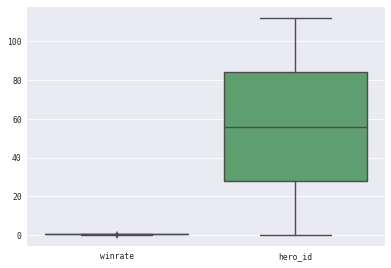

In [24]:
sns.boxplot(gb_heroID)
#vllt ist ein Histogramm besser

#### Champions mit einer Gewinnchance über 50 %

In [45]:
m = gb_heroID[(gb_heroID['winrate'] > 0.5)]
m.head()

,winrate,hero_id
5,0.562169,5
6,0.518660,6
7,0.521411,7
8,0.524041,8
9,0.539709,9


In [41]:
m.shape

(66, 2)

#### Champions mit einer Gewinnchance weniger 50%.

In [44]:
w = gb_heroID[(gb_heroID['winrate'] < 0.5)]
w.head()

,winrate,hero_id
0,0.136364,0
1,0.484149,1
2,0.454823,2
3,0.487500,3
4,0.469646,4


#### Beliebteste Champions pro Land

In [48]:
##clusters['region'].value_counts()

EUROPE                  8
STOCKHOLM               8
SINGAPORE               6
US EAST                 4
SOUTHAFRICA             3
BRAZIL                  3
US WEST                 3
AUSTRIA                 3
CHILE                   2
AUSTRALIA               2
JAPAN                   2
PW TELECOM SHANGHAI     1
PW TELECOM GUANGDONG    1
PW TELECOM WUHAN        1
PW UNICOM TIANJIN       1
DUBAI                   1
INDIA                   1
PW UNICOM               1
PERU                    1
PW TELECOM ZHEJIANG     1
Name: region, dtype: int64